<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Global_Climate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [52]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
sns.__version__

'0.9.0'

In [53]:
global_mean_temperature = pd.DataFrame(
    {
        "Year": [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016],
        "Temperature_Mean": [.62,.64,.52,.63,.70,.59,.62,.65,.73,.87,.99]
    }
)
global_mean_temperature
#Now we have a dataframe with the year and the global temperature mean

,Year,Temperature_Mean
0,2006,0.62
1,2007,0.64
2,2008,0.52
3,2009,0.63
4,2010,0.70
5,2011,0.59
6,2012,0.62
7,2013,0.65
8,2014,0.73
9,2015,0.87


Here is the link to the Temperature page: https://data.giss.nasa.gov/gistemp/

Here is a link to the Temperature mean data I used: https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv

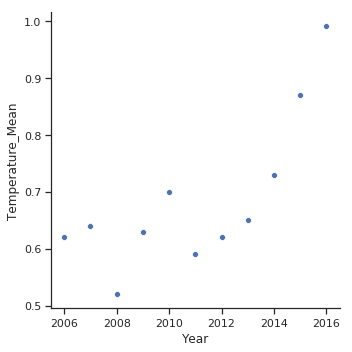

In [54]:
sns.relplot('Year','Temperature_Mean', data=global_mean_temperature, alpha=1.0)
#let's plot the data to show the yearly temperature mean from 2008 to 2018

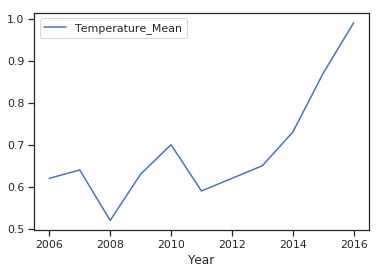

In [55]:
lines = global_mean_temperature.plot.line(x='Year', y='Temperature_Mean')

As you can see the global mean temperature has been steadily increasing, but in 2017 in began to decrease!

In [56]:
global_mean_carbon = pd.DataFrame(
    {
        "Year": [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016],
        "Carbon_Mean": [380.94,382.68,384.78,386.29,388.57,390.45,392.46,395.19,397.12,399.41,402.86]
    }
)
global_mean_carbon
#We are going to make a new dataframe with year and the yearly carbon mean

,Year,Carbon_Mean
0,2006,380.94
1,2007,382.68
2,2008,384.78
3,2009,386.29
4,2010,388.57
5,2011,390.45
6,2012,392.46
7,2013,395.19
8,2014,397.12
9,2015,399.41


Here is the link to the Carbon page: https://www.esrl.noaa.gov/gmd/ccgg/trends/gl_data.html

Here is a link to the carbon mean data I used: ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_annmean_gl.txt

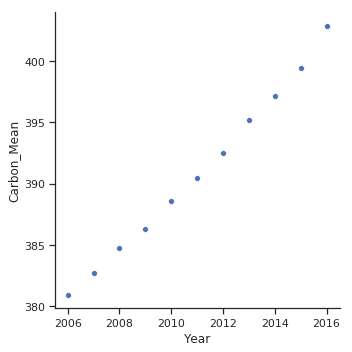

In [57]:
sns.relplot('Year','Carbon_Mean', data=global_mean_carbon, alpha=1.0)
#We are going to plot the dataframe to show the yearly carbon mean

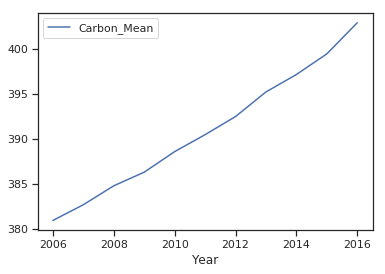

In [58]:
lines = global_mean_carbon.plot.line(x='Year', y='Carbon_Mean')

As you can see there is a steady increase in the global carbon mean each year

In [59]:
global_mean_carbon_and_temperature = pd.DataFrame(
    {
        "Year": [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016],
        "Carbon_Mean": [380.94,382.68,384.78,386.29,388.57,390.45,392.46,395.19,397.12,399.41,402.86],
        "Temperature_Mean": [.62,.64,.52,.63,.70,.59,.62,.65,.73,.87,.99]
    }
)
global_mean_carbon_and_temperature
#Let's make a dataframe that has the year, the global carbon annual mean, and the global temperature annual mean

,Year,Carbon_Mean,Temperature_Mean
0,2006,380.94,0.62
1,2007,382.68,0.64
2,2008,384.78,0.52
3,2009,386.29,0.63
4,2010,388.57,0.70
5,2011,390.45,0.59
6,2012,392.46,0.62
7,2013,395.19,0.65
8,2014,397.12,0.73
9,2015,399.41,0.87


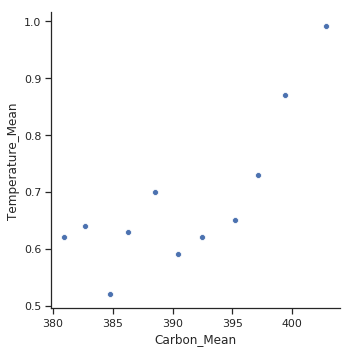

In [60]:
sns.relplot('Carbon_Mean','Temperature_Mean', data=global_mean_carbon_and_temperature, alpha=1.0)
#We are now comparing the carbon mean (X Axis), to the temperature mean (Y Axis)

As you can see there is a increase in temperature mean as the carbon mean increases

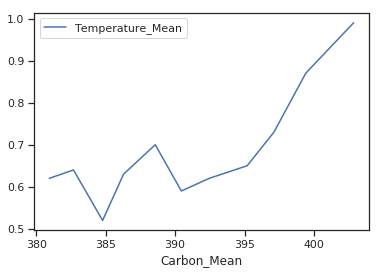

In [61]:
lines = global_mean_carbon_and_temperature.plot.line(x='Carbon_Mean', y='Temperature_Mean')

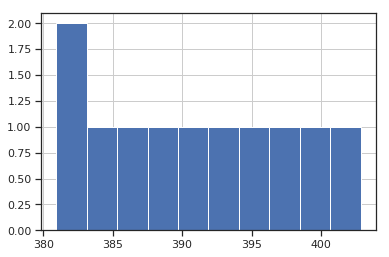

In [62]:
global_mean_carbon_and_temperature['Carbon_Mean'].hist()  

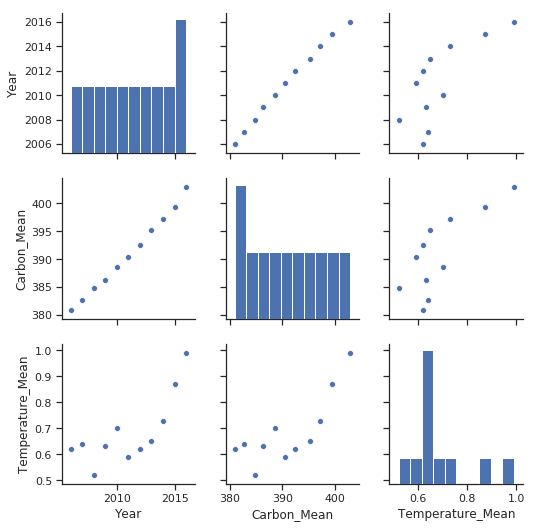

In [63]:
sns.set(style="ticks")

sns.pairplot(global_mean_carbon_and_temperature)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



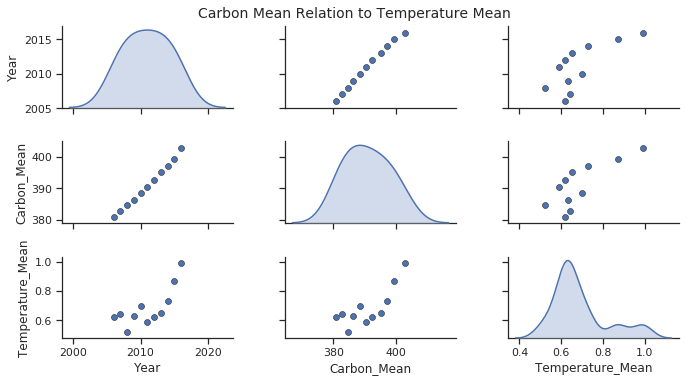

In [64]:
cols = ['Year', 'Carbon_Mean', 'Temperature_Mean']
pp = sns.pairplot(global_mean_carbon_and_temperature[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Carbon Mean Relation to Temperature Mean', fontsize=14)

Text(0.5, 0, 'Year')

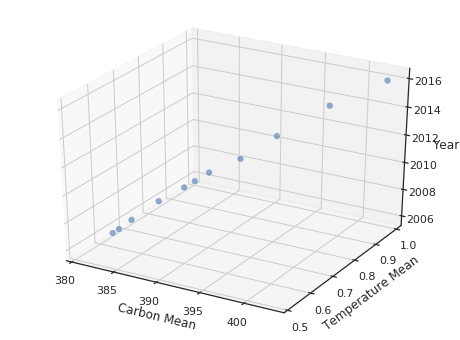

In [67]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = global_mean_carbon_and_temperature['Carbon_Mean']
ys = global_mean_carbon_and_temperature['Temperature_Mean']
zs = global_mean_carbon_and_temperature['Year']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Carbon Mean')
ax.set_ylabel('Temperature Mean')
ax.set_zlabel('Year')